# Explore the activations

- Sigmoid
- Tanh
- ReLU
- SeLU
- SeNLU ([-a, a])
- SeNLU_V2 ([0, 2.a])

---
### Sigmoid

\begin{align}
    f(x) = \frac{1}{1 + e^x}
\end{align}

Populating the interactive namespace from numpy and matplotlib


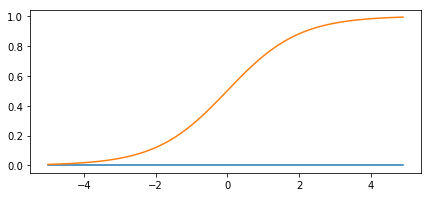

---
after 0 iteration, mean is 0.50 and std is 0.21
after 1 iteration, mean is 0.62 and std is 0.05
after 2 iteration, mean is 0.65 and std is 0.01
after 3 iteration, mean is 0.66 and std is 0.00


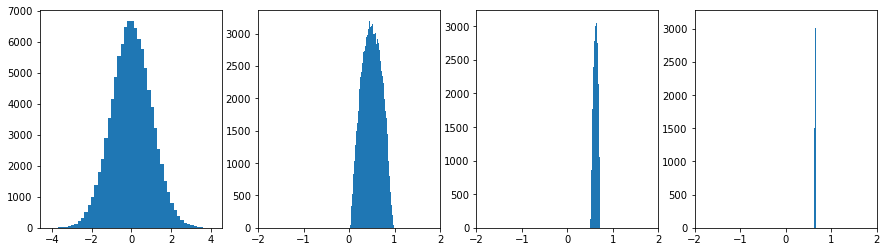

In [16]:
import keras
from os import sys, path
sys.path.append(path.abspath('../src'))
from utils import plot_activations, plot_activations_distributions
%pylab inline

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

pylab.rcParams['figure.figsize'] = (7,3)
plot_activations(sigmoid)

print '---'
pylab.rcParams['figure.figsize'] = (15, 4)
plot_activations_distributions(sigmoid)

---
### Tanh


\begin{align}
    f(x) = \text{tanh}(x)
\end{align}

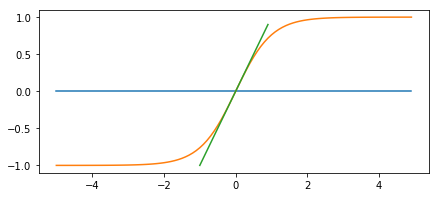

---
after 0 iteration, mean is -0.00 and std is 0.63
after 1 iteration, mean is -0.00 and std is 0.52
after 2 iteration, mean is -0.00 and std is 0.46
after 3 iteration, mean is -0.00 and std is 0.42


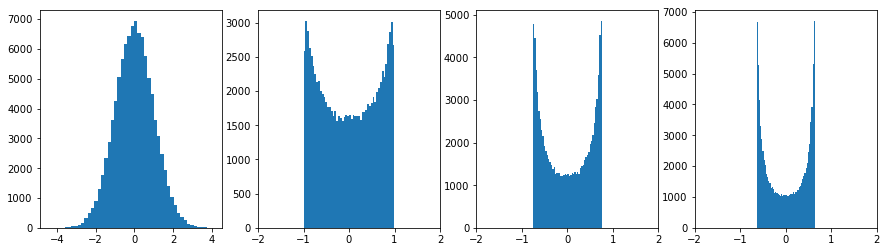

In [17]:
def tanh(x):
    return np.tanh(x)

pylab.rcParams['figure.figsize'] = (7,3)
plot_activations(tanh, show_id=True)

print '---'
pylab.rcParams['figure.figsize'] = (15, 4)
plot_activations_distributions(tanh)

---
### Relu

\begin{align}
    f(x) = \left\{
    \begin{matrix}
        x & \text{ if } x > 0\\ 
        0 & \text{ else}
    \end{matrix}
    \right.
\end{align}

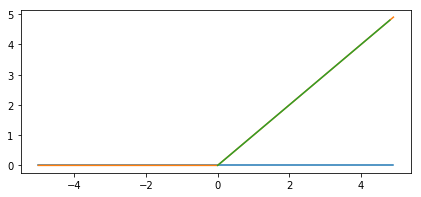

---
after 0 iteration, mean is 0.40 and std is 0.58
after 1 iteration, mean is 0.40 and std is 0.58
after 2 iteration, mean is 0.40 and std is 0.58
after 3 iteration, mean is 0.40 and std is 0.58


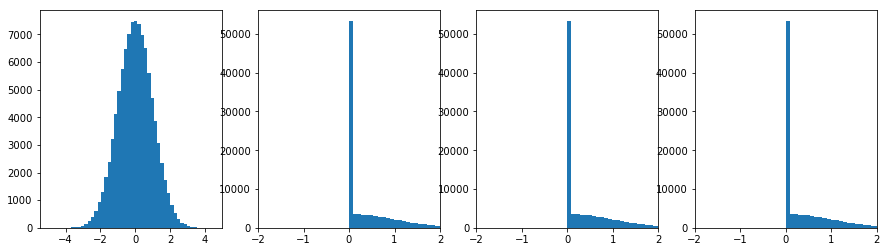

In [18]:
pylab.rcParams['figure.figsize'] = (7,3)

def relu(x):
    return np.maximum(0, x)

pylab.rcParams['figure.figsize'] = (7,3)
plot_activations(relu, show_id=True)

print '---'
pylab.rcParams['figure.figsize'] = (15, 4)
plot_activations_distributions(relu)

---
### SeLU

\begin{align}
    f(x) = \lambda \left\{
    \begin{matrix}
        x & \text{ if } x > 0\\ 
        \alpha (e^x -1 ) & \text{ else}
    \end{matrix}
    \right.
    \\ \\
    \alpha = 1.6732632423543772848170429916717 \\
    \lambda = 1.0507009873554804934193349852946
\end{align}

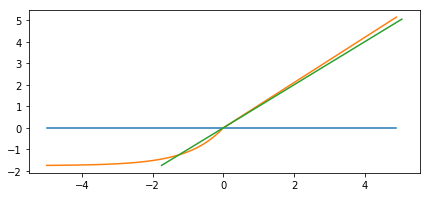

---
after 0 iteration, mean is -0.00 and std is 1.00
after 1 iteration, mean is -0.02 and std is 1.05
after 2 iteration, mean is -0.04 and std is 1.10
after 3 iteration, mean is -0.05 and std is 1.16


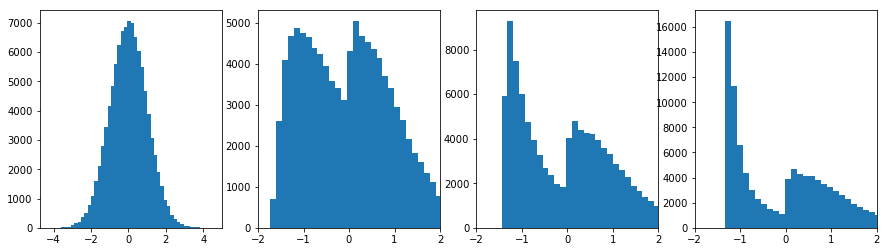

In [19]:
def selu(x):
    alpha = 1.6732632423543772848170429916717
    scale = 1.0507009873554804934193349852946    
    if x > 0:
        return scale * x
    return scale * (alpha * (np.exp(x) - 1))


pylab.rcParams['figure.figsize'] = (7,3)
plot_activations(selu, show_id=True)

print '---'
pylab.rcParams['figure.figsize'] = (15, 4)
plot_activations_distributions(selu)

---
### SeNLU

\begin{align}
    f(x) = \alpha \left\{
    \begin{matrix}
        -(e^{-x} -1) & \text{ if } x > 0\\ 
        (e^x -1) & \text{ else}
    \end{matrix}
    \right.
    \\  \\
    \alpha = 1.758099340847376859940217520812
\end{align}

\begin{align}
    f(x) = - \text{sign}(x) \cdot \alpha (e^{-\text{sign}(x) \cdot x} -1)\\
\end{align}

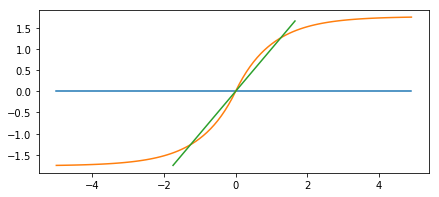

---
after 0 iteration, mean is -0.00 and std is 0.95
after 1 iteration, mean is -0.00 and std is 0.99
after 2 iteration, mean is -0.00 and std is 1.05
after 3 iteration, mean is -0.00 and std is 1.11


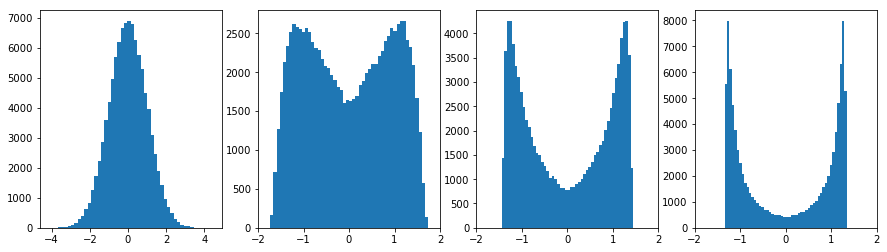

In [20]:
def SeNLU(x):
    alpha = 1.758099340847376859940217520812
    sigx = np.sign(x)
    return - sigx * alpha * (np.exp(- sigx * x) - 1)
    
    # Or ...
    if x > 0:
        return - alpha * (np.exp(- x) - 1)
    return alpha * (np.exp(x) - 1)

pylab.rcParams['figure.figsize'] = (7,3)
plot_activations(SeNLU, show_id=True)

print '---'
pylab.rcParams['figure.figsize'] = (15, 4)
plot_activations_distributions(SeNLU)

---
### SeNLU [0, 2.a]

\begin{align}
    f(x) = -\alpha \left\{
    \begin{matrix}
        -(e^{-x} - \alpha) + \alpha & \text{ if } x > 0\\ 
        (e^x - \alpha) + \alpha & \text{ else}
    \end{matrix}
    \right.
    \\ \\
    \alpha = 1.758099340847376859940217520812
\end{align}

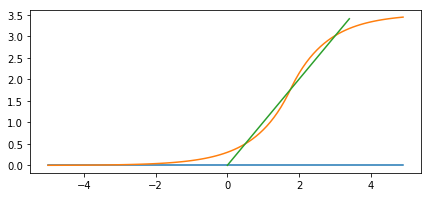

---
after 0 iteration, mean is 1.76 and std is 0.95
after 1 iteration, mean is 1.76 and std is 0.99
after 2 iteration, mean is 1.76 and std is 1.05
after 3 iteration, mean is 1.76 and std is 1.11


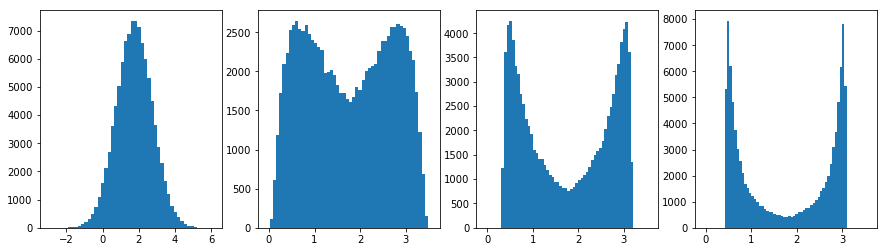

In [26]:
def SeNLU2(x):
    alpha = 1.758099340847376859940217520812
    x = x - alpha  # shift is important !
    sign = -1 if x < 0 else 1
    return - sign * alpha * (np.exp(sign * (-x)) - 1) + alpha

pylab.rcParams['figure.figsize'] = (7,3)
plot_activations(SeNLU2, show_id=True)

print '---'
pylab.rcParams['figure.figsize'] = (15, 4)
plot_activations_distributions(SeNLU2, n_mean=1.758, xlim=[-0.242, 3.758])

---
### No clues, just trying things


In [ ]:
def perso(x):
    if np.abs(x) > 2:
        return np.sign(x)
    if np.abs(x) > 0.2:
        return (1 / 3. * x) + np.sign(x) * 1 / 3.
    return 2 * x

pylab.rcParams['figure.figsize'] = (7,3)
plot_activations(perso, range=[-3,3,0.01], show_id=True)

print '---'
pylab.rcParams['figure.figsize'] = (15, 4)
plot_activations_distributions(perso, xlim=[-2, 2])

In [ ]:
def perso2(x):
    if np.abs(x) > 1.59:
        return - 2 * np.sign(x) * (np.exp(np.sign(- x) * x) - 1)
    return x

pylab.rcParams['figure.figsize'] = (7,3)
plot_activations(perso2, range=[-3,3,0.01], show_id=True)

print '---'
pylab.rcParams['figure.figsize'] = (15, 4)
plot_activations_distributions(perso2, xlim=[-2, 2])